In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline, make_union
from sklearn.base import TransformerMixin
from sklearn.feature_selection import SelectKBest
import itertools
from sklearn.linear_model import SGDRegressor
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline


import pandas
import numpy as np
from sklearn.grid_search import GridSearchCV
dfNotNull = pandas.read_csv('Long.csv')
dfNotNull = dfNotNull[dfNotNull.noCPT == 0]
#dfNotNull = dfNotNull.drop(dfNotNull.index[[218]])
dfNotNull.head()
print dfNotNull.Procedure3.value_counts()

Lumbar Radiofrequency                    221
Lumbar ESI                               141
Lumbar Medial Branch Block               113
Facet Joint Injection                     69
Cervical/Thoracic Medial Branch Block     42
Spinal Cord Stimulator                    26
Cervical/Thoracic ESI                     25
Cervical/Thoracic Radiofrequency          18
Joint Injection, other                     9
Nerve Block                                7
Not Assigned                               1
Name: Procedure3, dtype: int64


In [27]:
print "Different Features sets and corr plots"

Procedure3feat = ['Lumbar Radiofrequency', 'Cervical/Thoracic Radiofrequency', 'Facet Joint Injection', 'Cervical/Thoracic ESI'] 
Procedure3feat += ['Cervical/Thoracic Medial Branch Block', 'Spinal Cord Stimulator', 'Nerve Block', 'Lumbar Medial Branch Block']
Procedure3feat += ['Lumbar ESI', 'Joint Injection, other']
                  
Procedure4feat = ['Radiofrequency','ESI', 'Medial Branch Block', 'Injection',  'Nerve Block 2','Spinal Cord Stimulator 2']
                  
ClassFeat = ['3', 'Gender', '1r']

NonScaledContfeat  = ['Age','BMI','HealthCodesLen', 'SurgicalHistoryLen']

ScaledContfeat  = ['AgeScaled','BMIScaled','HealthCodesLenScaled', 'SurgicalHistoryLenScaled']

HealthCodes = ['M54', 'G25', 'M51', 'M50', 'M53', 'G54', 'E78', 'C177', 'D51', 'G3', 'G2', 'N28', 'I73', 'M48', 'M43', 'M41', 'M46', 'M47', 'Z79', 'F32', 'G57', 'D68', 'Q76', 'Z72', 'Y92', 'T85', 'I69', 'C182', 'M32', 'G40','F03', 'G47', 'C178', 'Y83', 'Y84', 'I50', 'C45', 'E05', 'M25', 'F12', 'F17', 'K74', 'I48', 'I42', 'C79', 'I25','E11', 'J45', 'C6', 'L40', 'E21', 'C189', 'N1', 'M96', 'M10', 'M12', 'M19', 'F41', 'Z01', 'J44', 'M79', 'J43', 'Z80','I89', 'Z85', 'Z87', 'Z86', 'Z89', 'Z88', 'C95', 'I1', 'N40', 'M84', 'M81', 'M06', 'G95', 'G90', 'R53', 'R56', 'E06', 'E07', 'K21', 'E03', 'Z96', 'Z94', 'Z95', 'Z92', 'Z90', 'Z91', 'Z98', 'E89', 'C81', 'G82', 'R26', 'Q61']

HealthCodes2 = ['C', 'E', 'D', 'G', 'F', 'I', 'K', 'J', 'M', 'L', 'N', 'Q', 'R', 'T', 'Y', 'Z']

CPTcodes = ['20610', '64479', '64640', '63650', '64483', '64480', '64634', '64635', '64636', '64484', '20605', '63685', '63688', '62311', '62310', '63661', '64494', '64495', '64633', '64490', '64491', '64492', '64493', '64450', '27096']

InsuranceCodes = ['BLUE CROSS','BLUE SHIELD','MEDICARE']
print dfNotNull.TotalTimeMin.mean()
sigCodesList = []
for i in HealthCodes:
    if len(dfNotNull[dfNotNull[i] == 1]) > 20 and abs(dfNotNull[dfNotNull[i] == 1].TotalTimeMin.mean() - 34.18) >=3 :
        print i + " = " + str(dfNotNull[dfNotNull[i] == 1].TotalTimeMin.mean()) + ", " + str(len(dfNotNull[dfNotNull[i] == 1]))
        sigCodesList += [i]
        

for i in HealthCodes2:
    if len(dfNotNull[dfNotNull[i] == 1]) > 20 and abs(dfNotNull[dfNotNull[i] == 1].TotalTimeMin.mean() - 34.18) >=0 :
        print i + " = " + str(dfNotNull[dfNotNull[i] == 1].TotalTimeMin.mean()) + ", " + str(len(dfNotNull[dfNotNull[i] == 1]))
        sigCodesList += [i]
cptCodesList = []
for i in CPTcodes:
    if len(dfNotNull[dfNotNull[i] == 1]) > 0 and abs(dfNotNull[dfNotNull[i] == 1].TotalTimeMin.mean() - 34.18) >=8 :
        print i + " = " + str(dfNotNull[dfNotNull[i] == 1].TotalTimeMin.mean()) + ", " + str(len(dfNotNull[dfNotNull[i] == 1]))
        cptCodesList += [i]
    
    
feature_cols = Procedure3feat + Procedure4feat + ClassFeat + NonScaledContfeat + sigCodesList
corrDF = dfNotNull[ NonScaledContfeat + ['TotalTimeMin']]
corrDF.corr()
print sigCodesList

print cptCodesList

Different Features sets and corr plots
34.1856725146
F32 = 42.347826087, 23
F17 = 31.0612244898, 98
M96 = 43.0961538462, 104
Z85 = 40.0833333333, 36
Z87 = 37.2727272727, 22
Z95 = 37.5675675676, 37
E = 33.864628821, 229
G = 40.1857142857, 70
F = 33.496, 125
I = 34.5345454545, 275
J = 35.4285714286, 84
M = 34.1785714286, 672
Z = 34.4704225352, 355
64640 = 50.0, 1
63650 = 93.32, 25
64483 = 23.9052631579, 190
64484 = 23.90625, 160
63685 = 113.0, 16
63688 = 89.0, 1
62310 = 25.0952380952, 42
63661 = 89.0, 1
27096 = 18.8, 5
['F32', 'F17', 'M96', 'Z85', 'Z87', 'Z95', 'E', 'G', 'F', 'I', 'J', 'M', 'Z']
['64640', '63650', '64483', '64484', '63685', '63688', '62310', '63661', '27096']


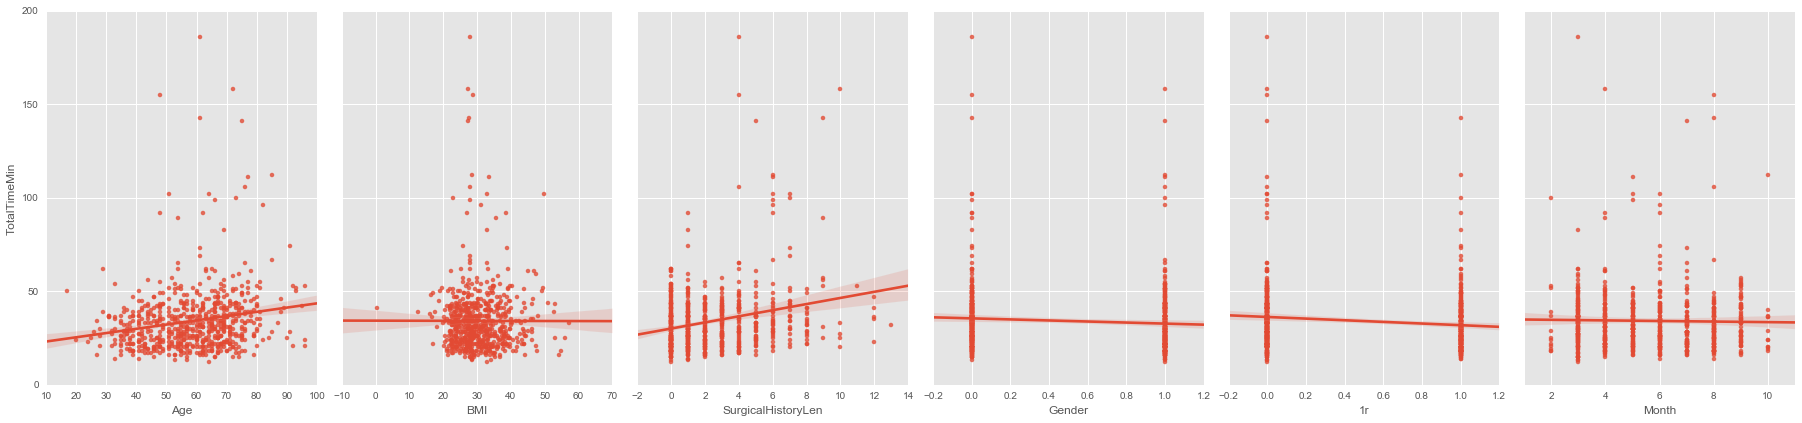

In [32]:
sns.pairplot(dfNotNull, x_vars=['Age','BMI', 'SurgicalHistoryLen', 'Gender', '1r', 'Month'], y_vars='TotalTimeMin', size=6, aspect=0.7, kind='reg')

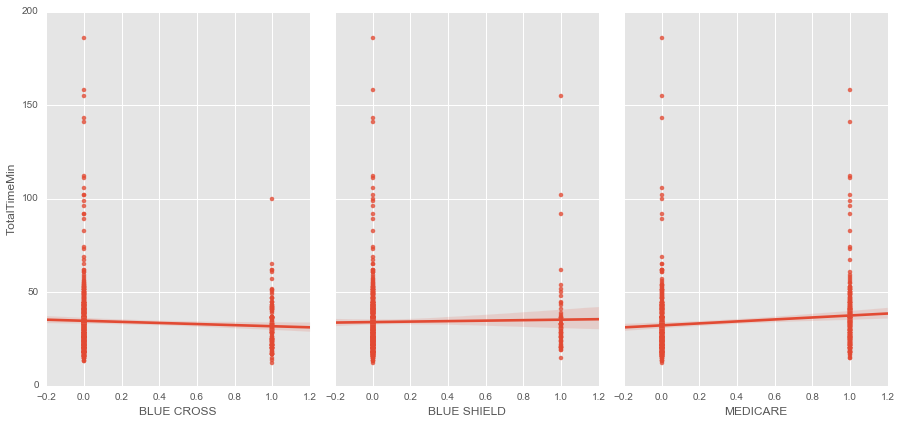

In [9]:
sns.pairplot(dfNotNull, x_vars=['BLUE CROSS','BLUE SHIELD','MEDICARE'], y_vars='TotalTimeMin', size=6, aspect=0.7, kind='reg')

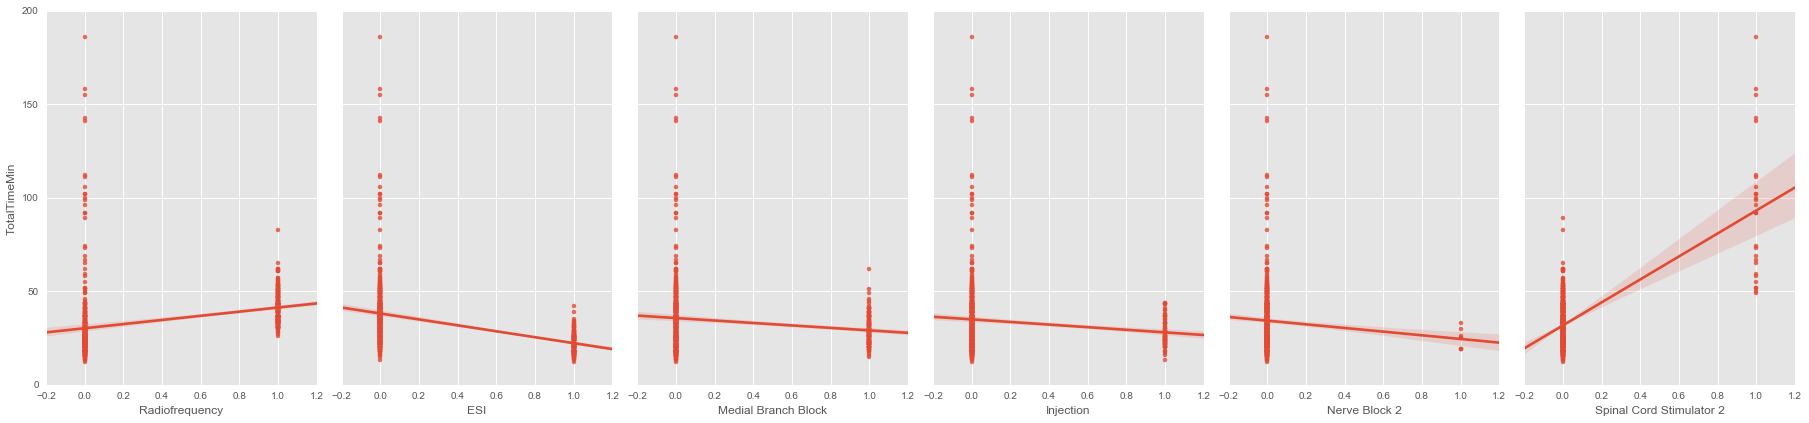

In [16]:
;sns.pairplot(dfNotNull, x_vars=['Radiofrequency','ESI', 'Medial Branch Block', 'Injection',  'Nerve Block 2','Spinal Cord Stimulator 2'], y_vars='TotalTimeMin', size=6, aspect=0.7, kind='reg')

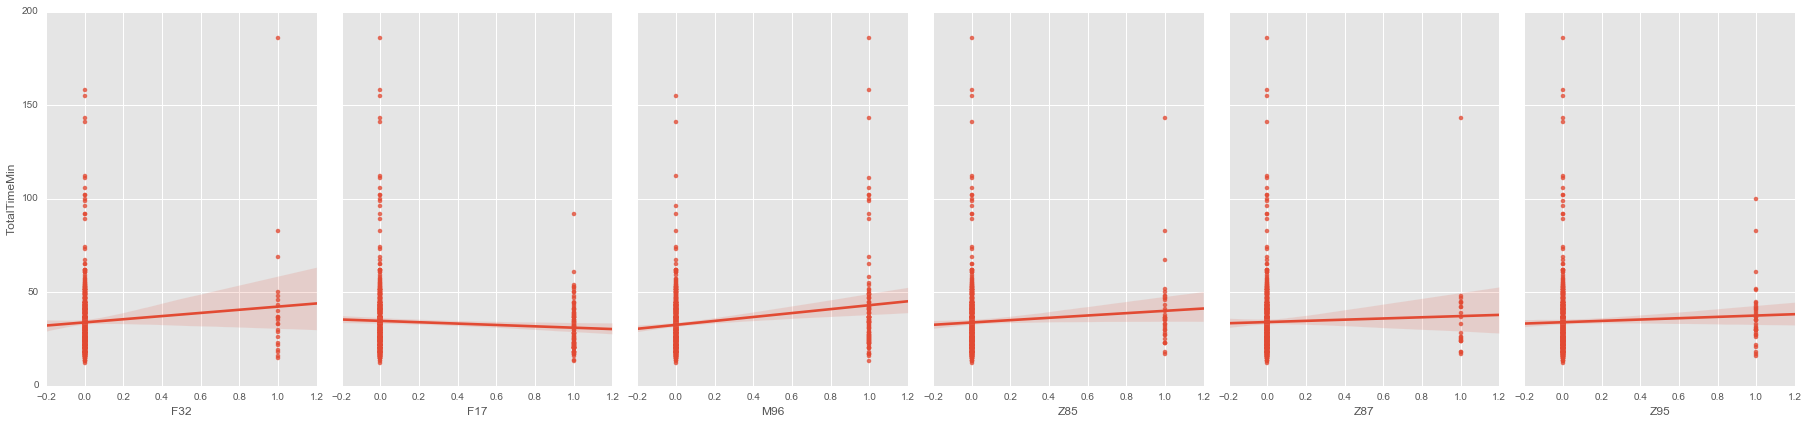

In [20]:
sns.pairplot(dfNotNull, x_vars=sigCodesList, y_vars='TotalTimeMin', size=6, aspect=0.7, kind='reg')

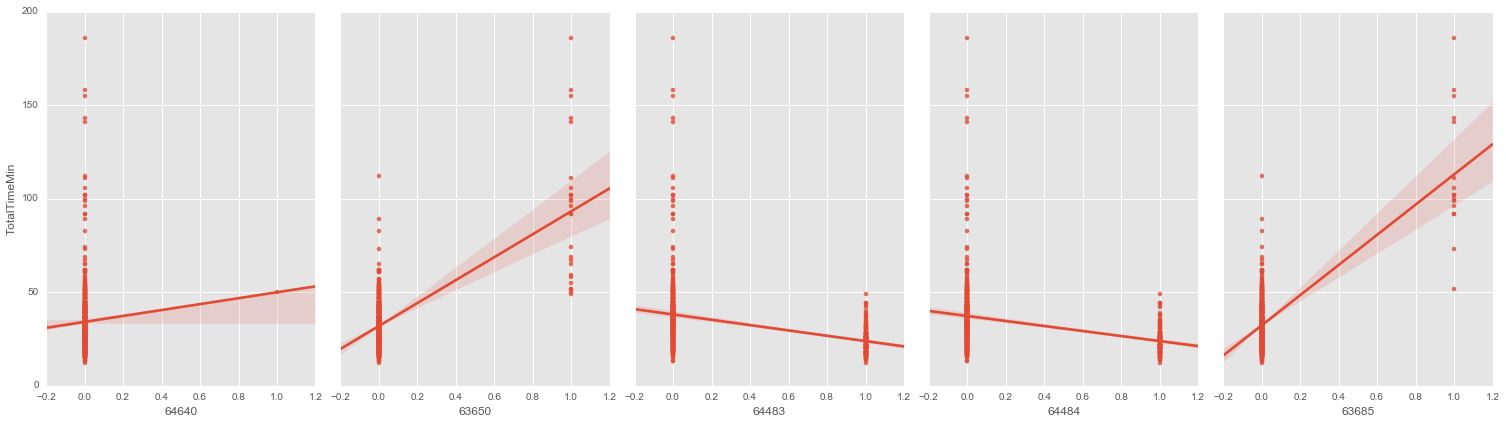

In [29]:
sns.pairplot(dfNotNull, x_vars=cptCodesList[:5], y_vars='TotalTimeMin', size=6, aspect=0.7, kind='reg')

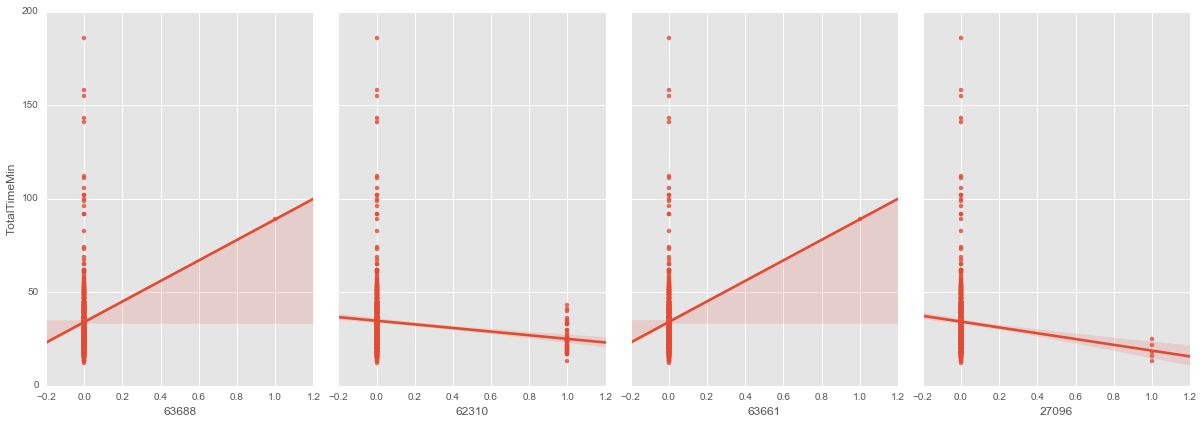

In [31]:
sns.pairplot(dfNotNull, x_vars=cptCodesList[5:11], y_vars='TotalTimeMin', size=6, aspect=0.7, kind='reg')

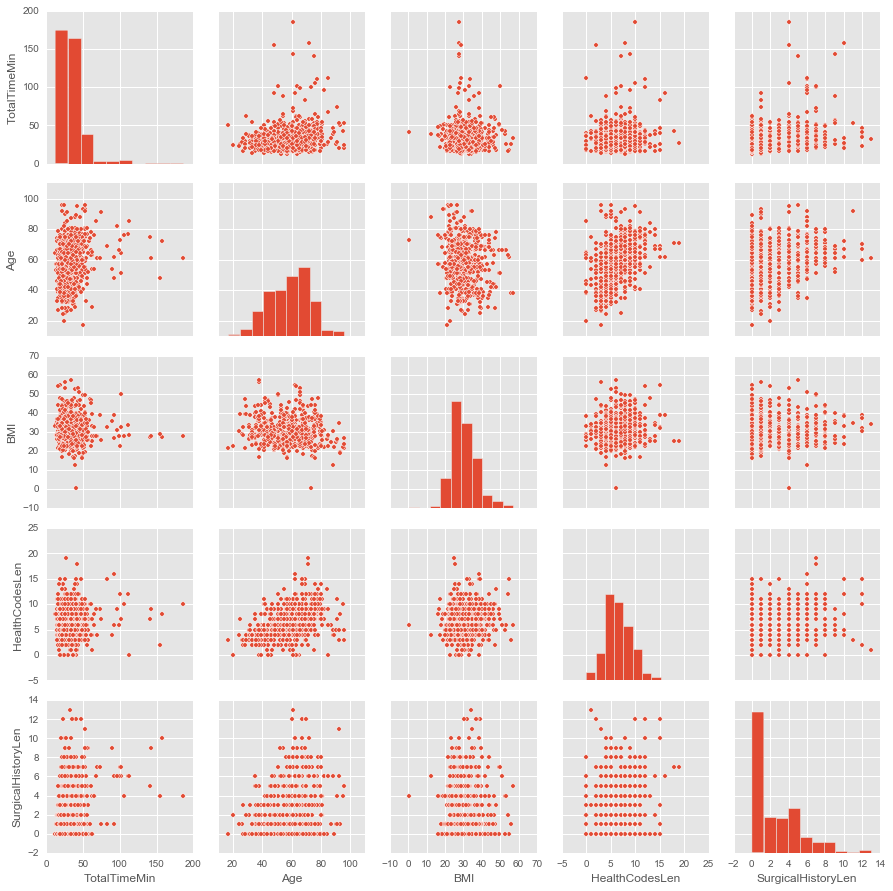

In [5]:
sns.pairplot(dfNotNull[['TotalTimeMin']+NonScaledContfeat])

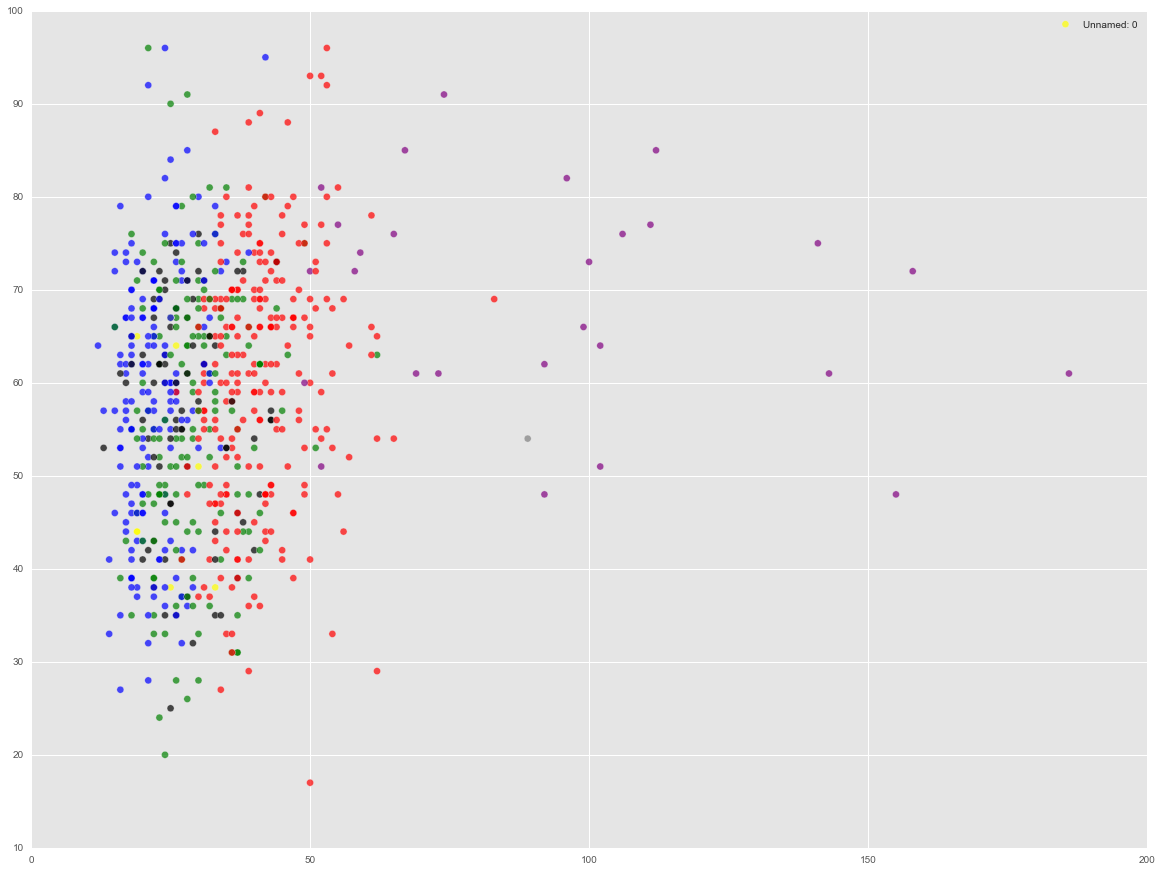

In [10]:
colortupe =('Radiofrequency','ESI', 'Medial Branch Block', 'Injection',  'Nerve Block 2','Spinal Cord Stimulator 2')
colors = {'Radiofrequency':'red', 'ESI':'blue', 'Medial Branch Block':'green', 'Injection':'black',
          'Nerve Block 2':'yellow','Spinal Cord Stimulator 2':'purple','Not Assigned':'grey' }
plt.scatter(dfNotNull['TotalTimeMin'],dfNotNull['Age'],c=dfNotNull['Procedure4'].apply(lambda x: colors[x]), alpha=0.7,s =50)
plt.rcParams['figure.figsize'] = (20, 15.0)

plt.legend(dfNotNull[dfNotNull['Procedure4']== 'Radiofrequency'] )


plt.show()

Select K Best Line Graph
Run KNN regression without scalar and with cross validation xyy
[ 16.59663794  16.56193741  11.97505986  11.42530133   9.33226628
   9.29219345   9.22675342   9.22871785   8.95411823   8.97086996
   8.95353707   8.97385722   9.01844622   9.07341965   8.98919369
   8.92619727   8.90907441   8.87247677   8.87583359   8.86736801
   8.93239686   8.91915969   8.89393028   8.90394697   8.93029367
   8.93076965   9.01494175   9.10143319]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27]


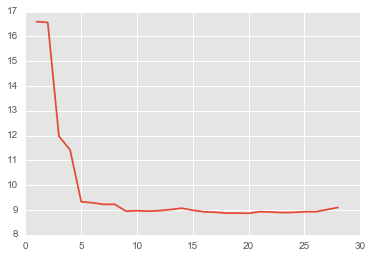

In [36]:
print "Select K Best Line Graph"
"Select KBest Linear Regression"

from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline, make_union
print "Run KNN regression without scalar and with cross validation xyy"


feature_cols = ['64640', '63650', '64634', '64480', '64635', '64636', '64484', '20605', '63685', '63688', '62311', 
                '62310', '63661', '64494', '64495', '64633', '64490', '64491', '64492', '64493', '64450', '27096', 
                'Gender', 'AgeScaled', 'F17', '3', '1r', 'ESI', 'Lumbar Radiofrequency', 'Nerve Block 2', 'Radiofrequency']
X = dfNotNull[feature_cols]
y = dfNotNull['TotalTimeMin']
mean2escores = []
for i in range (1, len(feature_cols)-2):
    #gridsearch with select kbest
    param_grid = dict()
    linreg4 = LinearRegression()
    filter1 = SelectKBest(k=i) # select the best 2 features
    pipe = Pipeline([('anova', filter1), ('lr', linreg4)])
    grid1 = GridSearchCV(pipe, param_grid, cv=5, scoring='mean_squared_error').fit(X,y)
    grid2= GridSearchCV(pipe, param_grid, cv=5, scoring='mean_absolute_error').fit(X,y)
    tf_features=str(grid1.best_estimator_.named_steps['anova'].get_support())
    abs_features=str(grid2.best_estimator_.named_steps['anova'].get_support())
    
    mean2escores3 = cross_val_score(grid1.best_estimator_ , X, y, cv=5, scoring='mean_squared_error')
    mean2escores4 = cross_val_score(grid2.best_estimator_ , X, y, cv=5, scoring='mean_absolute_error')


    mean2escores += [np.sqrt(-mean2escores3).mean()]
    
print np.array(mean2escores) 
print np.arange(1,len(mean2escores))
plt.plot(np.arange(1,len(mean2escores)+1),np.array(mean2escores))

   